In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
galton = pd.read_csv("/home/ran/Downloads/GaltonFamilies.csv")
cancer = pd.read_csv("/home/ran/Downloads/breast_cancer.csv")

In [2]:
galton.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


Text(0,0.5,'childHeight')

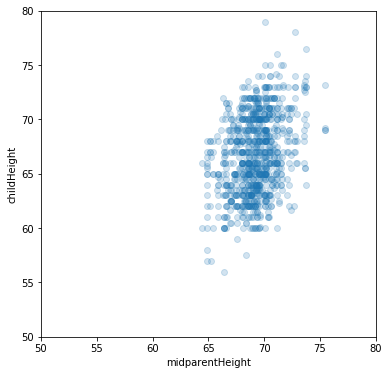

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(galton.midparentHeight, galton.childHeight, alpha=0.2)
plt.xlim(50,80)
plt.ylim(50,80)
plt.xlabel("midparentHeight")
plt.ylabel("childHeight")

#零假设：父母身高和孩子身高没有关系
#备择假设：父母身高和孩子身高有关系

# 研究两个数值型变量间的关系，应该应用单变量回

# 归分析

# 不能把midparentHeight分布当做childHeight的

# 理论分布来做t检验

In [4]:
galton[["midparentHeight", "childHeight"]].corr()

,midparentHeight,childHeight
midparentHeight,1.00000,0.32095
childHeight,0.32095,1.00000


In [5]:
from statsmodels.formula.api import ols
model = ols("galton.childHeight~galton.midparentHeight", galton).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     galton.childHeight   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     107.0
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           8.05e-24
Time:                        11:38:20   Log-Likelihood:                -2465.0
No. Observations:                 934   AIC:                             4934.
Df Residuals:                     932   BIC:                             4944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 22.6362      4.265      5.307      0.000      14.266      31.007
galton.midparentHeight     0.6374      0.062     10.345      0.000       0.516       0.758
==============================================================================
Omnibus:                       48.564   Durbin-Watson:                   1.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.850
Skew:                           0.061   Prob(JB):                     4.89e-05
Kurtosis:                       2.296   Cond. No.                     2.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
model.pvalues

Intercept                 1.390930e-07
galton.midparentHeight    8.053865e-24
dtype: float64

p of galton.midparentHeight < 0.05
拒绝原假设，midparentHeight 和 childHeight 之间有关系。

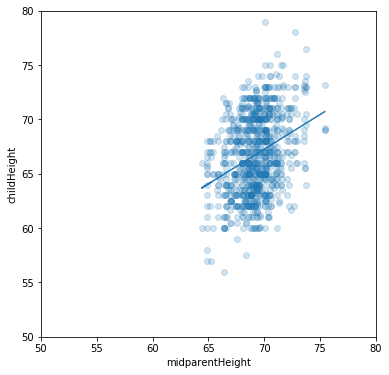

In [7]:
y = model.predict(galton.midparentHeight)
plt.figure(figsize=(6,6))
plt.scatter(galton.midparentHeight, galton.childHeight, alpha=0.2)
plt.xlim(50,80)
plt.ylim(50,80)
plt.xlabel("midparentHeight")
plt.ylabel("childHeight")
plt.plot(galton.midparentHeight, y)
plt.show()

Text(0.5,1,'patients')

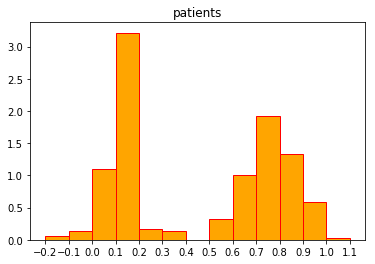

In [8]:
n1, _, _= plt.hist(cancer[(cancer.Disease_status == 2) | (cancer.Disease_status == 4)].methylaiton_value,
        bins = np.arange(-0.2, 1.2, 0.1), 
        edgecolor = 'r',
        color = 'orange',
        density = True)
plt.xticks(np.arange(-0.2, 1.2, 0.1))
plt.title("patients")

Text(0.5,1,'healthy people')

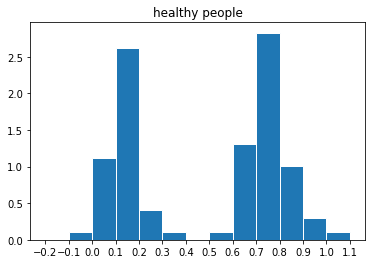

In [9]:
n2, _, _ = plt.hist(cancer[(cancer.Disease_status == 0) 
                | (cancer.Disease_status == 1) 
                | (cancer.Disease_status == 3)].methylaiton_value,
        bins = np.arange(-0.2, 1.2, 0.1),
        edgecolor = "white",
        density = True)
plt.xticks(np.arange(-0.2, 1.2, 0.1))
plt.title("healthy people")

In [10]:
原假设：正常组和疾病组的甲基化测量值没有差异
备择假设：正常组和疾病组的甲基化测量值有显著差异

SyntaxError: invalid character in identifier (<ipython-input-10-47edc4eb7419>, line 1)

In [11]:
for i in n1:
    if i == 0.:
        i = 1
for i in n2:
    if i == 0.:
        i = 0.001

In [12]:
def TVD(distribution1, distribution2):
    return np.abs(distribution1 - distribution2).sum()/2

In [13]:
import random
def randomPick(somelist, probabilities):
    x = random.uniform(0,1)
    cumulativeProb = 0.0
    for item, itemprob in zip(somelist, probabilities):
        cumulativeProb += itemprob
        if x < cumulativeProb:
            break
    return item
def getSample(elements, probabilities, size):
    n = 0
    sample = []
    while n < size:
        sample.append(randomPick(elements, probabilities))
        n += 1
    for i in elements:
        sample.append(i)
    return sample

In [14]:
elements = np.arange(-0.15, 1.15, 0.1)
elements

array([-0.15, -0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,
        0.75,  0.85,  0.95,  1.05])

In [15]:
TVDs = []
for i in range(1000):
    sample = getSample(elements, n2*0.1, 10000)
    _, sampleproportion = np.unique(sample, return_counts=True)
    TVDs = np.append(TVDs, TVD(np.divide(sampleproportion, 10000), n2*0.1))

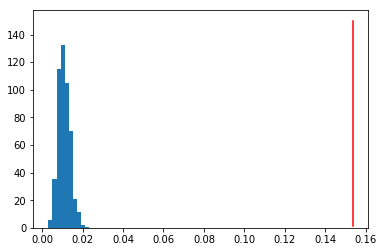

In [29]:
plt.hist(TVDs, density = True)
plt.plot([TVD(n1*0.1,n2*0.1), TVD(n1*0.1,n2*0.1)], [1,150], color = "r")

In [27]:
p = len(TVDs[TVDs > TVD(n1*0.1,n2*0.1)])/len(TVDs)
p

0.0

In [ ]:
p < 0.05, 拒绝原假设，正常组和疾病组的甲基化测量值有明显差异